> 

# Project: Medical Appointments Investigation 
### by Banji Owabumoye

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Medical appointments in some neighbourhoods in Brazil will be investigated in this project. The investigation will assist knowing factors to consider in order to predict availability of patients on scheduled date. Brazil is the largest country in South America with over 200 million population.  [wikipedia](https://en.wikipedia.org/wiki/Brazil).


### Dataset Description 
**No-show dataset** will be used for this project. The dataset contains some medical information on medical appointments of over one hundred thousand `(100,000)` patients, in some selected Brazilian neighbourhoods. These neighbourhoods are where the hospitals are located. The 14 variables of this dataset are:

**PatientId:** identification of the patient

**AppointmentID:** identification of each appointment

**Gender:** male or female

**ScheduledDay:** the day the patient is expected to come to the hospital

**AppointmentDay:** the day the patient is registered and given a date to come to the hospital

**Age:** how old is the patient

**Neighbourhood:** geographical location of appointment

**Scholarship:** patients that are enrolled or not enrolled in welfare program of Brazil 

**Hipertension:** true or false

**Diabetes:** true or false

**Alcoholism:** true or false

**Handcap:** true or false

**SMS_received:** 1 or more messages sent to patient

**No-show:** true or false (No or Yes). Please note: `'No'` means the patient was not absent and `'Yes'` means the patient was absent.

 
### Question(s) for Analysis


Considering variables provided in the dataset, factors that can be used to predict patients' availability for appointment on scheduled date are:

1.What is the population distribution of patients from each neighbourhood and from which neighbourhood are patients likely to be more?

2.Considering male and female genders in the dataset, which gender would likely show up more on scheduled day and are younger patients likely to be available on scheduled day than older patients?

3.Which of the weekdays are patients most likely to be present?

4.Are patients captured in welfare program (scholarship) more than those not captured and are patients that received sms-message more than those that did not receive on scheduled day?
> 

In [5]:
# Import packages that will be needed for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import day_name

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [6]:
# loading dataset and converting to dataframe. 
med_df = pd.read_csv('no_show.csv')

In [7]:
# to view the columns and few rows of the dataset
med_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


>`head()` function will be used as much as possible in this project to view output of operations 

In [8]:
# to have quick insight on rows number, columns number, and data type
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>The dataset contains 110527 rows and 14 columns. The dataset rows are complete without missing or null values. However, the column labels containing uppercase character will be converted to lowercase in order to avoid some errors during analysis. **'ScheduledDay'** and **'AppointmentDay'** columns will be converted from *object* datatype to *datetime* datatype. 

>`info()` function will be used as much as possible in this project to view effect of operations

In [9]:
# checking for dataset duplicate
sum(med_df.duplicated())

0

>The dataset has no duplicated rows

In [10]:
# summarized descriptive statistics of the dataset
med_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>The output of the descriptive statistics reveals that the youngest person is less than a year and the oldest 
person is 115 years old. Also, columns like scholarship, hipertension, diabetes, alcoholism, handcap, and sms_received contain 0 and 1 categorical data


### Data Cleaning

In [11]:
# function for converting object datatype to datetime datatype
def to_date(new_column, old_column):
    """ Conversion of some columns datatype 
    to datetime datatype in a new column 
    """
    med_df[new_column] = pd.to_datetime(med_df[old_column])
    
# using to_date function to convert columns to datetime datatype
to_date('Appointment_date', 'AppointmentDay')
to_date('Scheduled_date','ScheduledDay')

med_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_date,Scheduled_date
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29 18:38:08
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 16:08:27


>*ScheduledDay* and *AppointmentDay* columns were converted from object datatype to datetime 
datatype. This will enable extraction of weekdays' numbers.

In [12]:
# confirm ScheduledDay and AppointmentDay columns datatype
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientId           110527 non-null float64
AppointmentID       110527 non-null int64
Gender              110527 non-null object
ScheduledDay        110527 non-null object
AppointmentDay      110527 non-null object
Age                 110527 non-null int64
Neighbourhood       110527 non-null object
Scholarship         110527 non-null int64
Hipertension        110527 non-null int64
Diabetes            110527 non-null int64
Alcoholism          110527 non-null int64
Handcap             110527 non-null int64
SMS_received        110527 non-null int64
No-show             110527 non-null object
Appointment_date    110527 non-null datetime64[ns]
Scheduled_date      110527 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(8), object(5)
memory usage: 13.5+ MB


In [13]:
# getting days number from Scheduled_date and creating day column
med_df['day'] = med_df['Scheduled_date'].dt.weekday

med_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_date,Scheduled_date,day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29 18:38:08,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 16:08:27,4


>Getting days number will enable generation of names of weekdays that will be used for analysis in this project

In [14]:
# # converting number of days to weekday name in a new column
med_df['days_name'] = med_df['day'].apply(lambda w:day_name[w])

med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
PatientId           110527 non-null float64
AppointmentID       110527 non-null int64
Gender              110527 non-null object
ScheduledDay        110527 non-null object
AppointmentDay      110527 non-null object
Age                 110527 non-null int64
Neighbourhood       110527 non-null object
Scholarship         110527 non-null int64
Hipertension        110527 non-null int64
Diabetes            110527 non-null int64
Alcoholism          110527 non-null int64
Handcap             110527 non-null int64
SMS_received        110527 non-null int64
No-show             110527 non-null object
Appointment_date    110527 non-null datetime64[ns]
Scheduled_date      110527 non-null datetime64[ns]
day                 110527 non-null int64
days_name           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(9), object(6)
memory usage: 15.2+ MB


>`days_name` column is added to the dataframe. The column will contain names of weekdays that will be used to answer some questions stated.

In [15]:
# changing column labels to lowercase 
med_df.columns = med_df.columns.str.lower()

med_df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,appointment_date,scheduled_date,day,days_name
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29 18:38:08,4,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 16:08:27,4,Friday


>Changing column labels to lowercase will reduce errors encountered when using these column labels due to case sensitivity of packages used

In [16]:
# changing column label having hyphen to underscore
med_df.rename({'no-show':'no_show'}, axis=1, inplace=True)

med_df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_date,scheduled_date,day,days_name
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29 18:38:08,4,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 16:08:27,4,Friday


In [17]:
# removing some columns
def del_column(column1, column2):
    """ To remove listed columns from dataframe """
    med_df.drop([column1, column2], axis=1, inplace=True)
    
# using del_column function to delete some columns
del_column('scheduledday','appointmentday')

med_df.head(2)

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_date,scheduled_date,day,days_name
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29 18:38:08,4,Friday
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29 16:08:27,4,Friday


>`scheduledday` and `appointmentday` columns were removed from the dataset because they are of datatype that is not needed,
and new columns containing their data values with datatype needed have been created.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
> ### What is the population distribution of patients from each neighbourhood and from which neighbourhoods are patients likely to be more?


##### Population Distribution

##### Please note:
##### No-show column: (No or Yes). 'No' means the patient was not absent, and 'Yes' means the patient was absent.

In [18]:
# population distribution of patients according to neighbourhoods
population=med_df.neighbourhood.value_counts() 

# top ten most populated areas
population.head(10)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: neighbourhood, dtype: int64

In [19]:
# ten neighbourhoods with least patients
population.tail(10)

UNIVERSITÁRIO                  152
SEGURANÇA DO LAR               145
NAZARETH                       135
MORADA DE CAMBURI               96
PONTAL DE CAMBURI               69
ILHA DO BOI                     35
ILHA DO FRADE                   10
AEROPORTO                        8
ILHAS OCEÂNICAS DE TRINDADE      2
PARQUE INDUSTRIAL                1
Name: neighbourhood, dtype: int64

##### Visualization of Neighbourhoods and their Population

In [20]:
# function for barchart
def subplots_bar(arr1, title1, xlabel1, ylabel1, xticklabels1, color1, arr2, title2, xlabel2, ylabel2, xticklabels2, color2):
    """ this function will plot two barcharts of equal sizes.
    Also, this function requires 12 arguments.
    
    arr1 = first numeric column of a dataframe
    title1 = first barchat title
    xlabel1 = first barchart xlabel
    ylabel1 = first barchart ylabel
    xticklabels1 = first barchart xticklabels
    color1 = first barchart color
    arr2= second numeric column of a dataframe
    title2 = second barchart title
    xlabel2 = second barchart xlabel
    ylabel2 = second barchart ylabel
    xticklabels2 = second barchart xticklabels
    color2 = second barchart color    
    """
    fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(15,6))
    
    arr1.plot(ax=axes[0], kind='bar', color=color1, alpha =.7, fontsize=11)
    axes[0].set_title(title1, fontsize=13)
    axes[0].set_xlabel(xlabel1, fontsize=15)
    axes[0].set_ylabel(ylabel1, fontsize=15)
    axes[0].set_xticklabels(xticklabels1, rotation = 60, ha ='right')
    axes[0].legend()
    
    arr2.plot(ax=axes[1], kind='bar', color=color2, alpha=.7, fontsize=11)
    axes[1].set_title(title2, fontsize=13)
    axes[1].set_xlabel(xlabel2, fontsize=15)
    axes[1].set_ylabel(ylabel2, fontsize=15)
    axes[1].set_xticklabels(xticklabels2, rotation=60, ha='right')
    axes[1].legend()

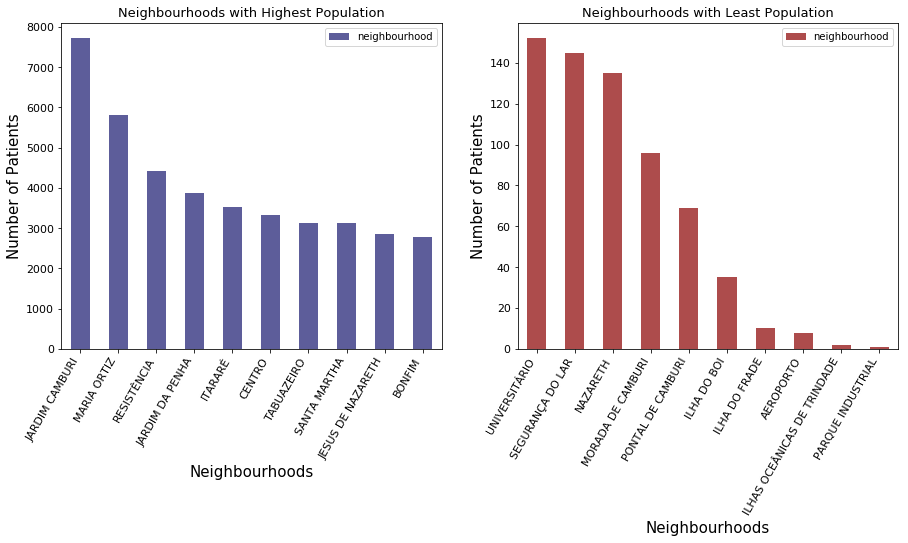

In [21]:
# Visual analyses of neighbourhoods population
subplots_bar(population.head(10),'Neighbourhoods with Highest Population','Neighbourhoods',
            'Number of Patients',population.head(10).index,'midnightblue',population.tail(10),
            'Neighbourhoods with Least Population','Neighbourhoods','Number of Patients',
            population.tail(10).index, 'darkred')

>It is evident from the analyses and the resultant visuals that `Jardim Camburi` neighbourhood with 7717 patients is the neighbourhood with highest population. 
`Parque Industrial` neighbourhood with 1 patient is the neighbourhood with least population. These analyses have shown that health workers should expect more patients from the ten neighbourhoods with highest number of patients.

### Research Question 2  
>#### Considering male and female genders in the dataset, which gender would likely show up more on scheduled day and are younger patients likely to be more than older patients on scheduled day

In [22]:
# filtering male population from the dataset
male = med_df.query('gender == "M"')
male_gender = male['gender'].count()
male_gender

38687

In [23]:
# filtering female population from the dataset
female = med_df.query('gender == "F"')
female_gender = female['gender'].count()
female_gender

71840

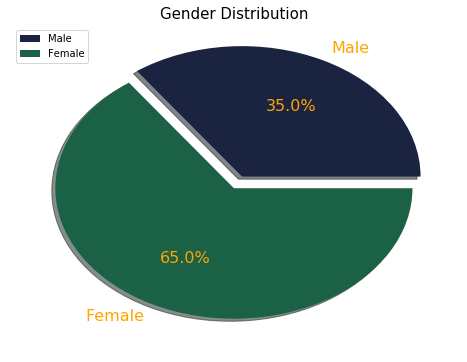

In [24]:
# visualization of male and female poulation
gender = [male_gender, female_gender]
plt.figure(figsize=(8,6))
label = ['Male', 'Female']
plt.title('Gender Distribution', size =15)
color = sns.color_palette('cubehelix')
explode = [0.1, 0]
plt.pie(gender, labels = label, explode=explode,
        colors = color, autopct='%.1f%%', shadow = True,  textprops={'fontsize': 16, 'color':'orange'})
plt.legend()
plt.show()

>Female population comprises 65% of the entire population, while male population comprises 35% of the entire population.
This can be reworded as female population is almost twice the population of male. With this insight, female patients are expected to be more than male patients on scheduled day.

##### Genders on Scheduled Day

In [25]:
# male patients honouring medical appointment according to neighbourhood
male_shown = med_df[(med_df.gender=='M') & (med_df.no_show=='No')].neighbourhood

# creating dataframe for ten most populated neighbourhoods with male patients
male_shown = male_shown.value_counts().head(10).to_frame()

# renaming dataframe column
male_shown.rename(columns = {'neighbourhood':'male'}, inplace=True)
male_shown

,male
JARDIM CAMBURI,2105
MARIA ORTIZ,1645
RESISTÊNCIA,1182
CENTRO,1059
JARDIM DA PENHA,995
SANTA MARTHA,954
ITARARÉ,929
TABUAZEIRO,908
BONFIM,862
JESUS DE NAZARETH,788


In [26]:
# female patients honouring medical appointment according to neighbourhood
female_shown = med_df[(med_df.gender == 'F') & (med_df.no_show == 'No')].neighbourhood

# creating dataframe for ten most populated neighbourhoods with female patients
female_shown = female_shown.value_counts().head(10).to_frame()

# renaming dataframe column
female_shown.rename(columns = {'neighbourhood':'female'}, inplace = True)
female_shown

,female
JARDIM CAMBURI,4147
MARIA ORTIZ,2941
RESISTÊNCIA,2343
JARDIM DA PENHA,2251
SANTA MARTHA,1681
ITARARÉ,1662
TABUAZEIRO,1651
CENTRO,1572
SANTO ANTÔNIO,1503
JESUS DE NAZARETH,1369


In [27]:
# combining male and female dataframes
male_female = pd.concat([male_shown, female_shown], axis=1, sort=False)

# removing rows with null value
male_female.dropna(inplace=True)
male_female

,male,female
JARDIM CAMBURI,2105.0,4147.0
MARIA ORTIZ,1645.0,2941.0
RESISTÊNCIA,1182.0,2343.0
CENTRO,1059.0,1572.0
JARDIM DA PENHA,995.0,2251.0
SANTA MARTHA,954.0,1681.0
ITARARÉ,929.0,1662.0
TABUAZEIRO,908.0,1651.0
JESUS DE NAZARETH,788.0,1369.0


>Rows with null value were droped because they will affect the expected comparism between male and female patients in the visualization

In [28]:
male_female['area'] = male_female.index
male_female

,male,female,area
JARDIM CAMBURI,2105.0,4147.0,JARDIM CAMBURI
MARIA ORTIZ,1645.0,2941.0,MARIA ORTIZ
RESISTÊNCIA,1182.0,2343.0,RESISTÊNCIA
CENTRO,1059.0,1572.0,CENTRO
JARDIM DA PENHA,995.0,2251.0,JARDIM DA PENHA
SANTA MARTHA,954.0,1681.0,SANTA MARTHA
ITARARÉ,929.0,1662.0,ITARARÉ
TABUAZEIRO,908.0,1651.0,TABUAZEIRO
JESUS DE NAZARETH,788.0,1369.0,JESUS DE NAZARETH


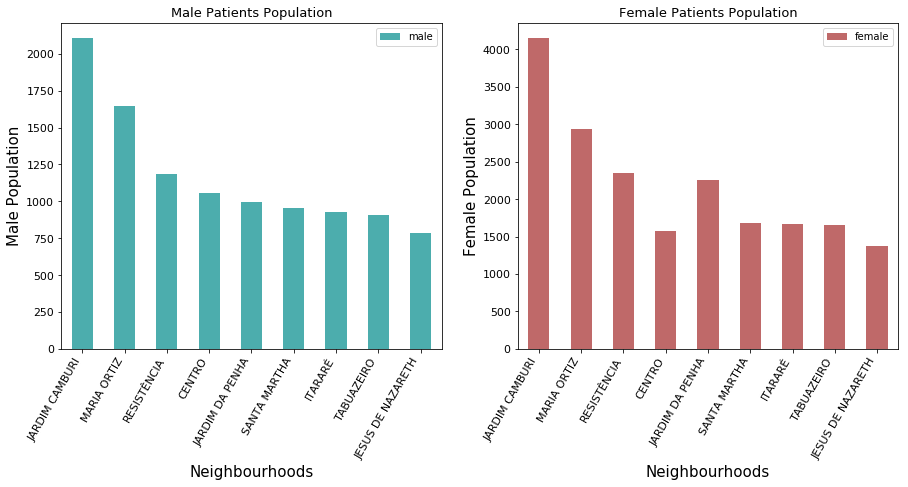

In [29]:
# Visual analyses of male to female population in the neighbourhoods
subplots_bar(male_female.male,'Male Patients Population','Neighbourhoods',
            'Male Population',male_female.area,'darkcyan',male_female.female,
            'Female Patients Population','Neighbourhoods','Female Population',
            male_female.area, 'brown')

>Female population is twice the population of male in most of the neighbourhoods. This means that more females are expected to be seen on scheduled day

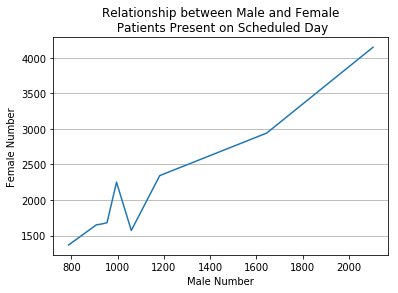

In [30]:
# relationship between male and female population
x= male_female.male
y= male_female.female
plt.title("Relationship between Male and Female\n Patients Present on Scheduled Day")
plt.xlabel("Male Number")
plt.ylabel("Female Number")

plt.plot(x, y)

plt.grid(axis = 'y')

plt.show()

The line chart shows there is positive relationship between male population and female population on scheduled day. As the male population increases, so also the female population. However, female population is twice the population of male. This implies that there is likelyhood of having more female patients on scheduled day 

###### Possibility of young patients population to be greater than adult population

In [31]:
# average age of patients
average_age = med_df.age.mean()
average_age

37.088874211731067

In [32]:
# population of patients that are equal or less than 37 years
younger = med_df[(med_df.age <= 37) & (med_df.no_show == 'No')].age.count()
younger

43356

In [33]:
# population of patients that are greater than 37 years
adult = med_df[(med_df.age > 37) & (med_df.no_show == 'No')].age.count()
adult

44852

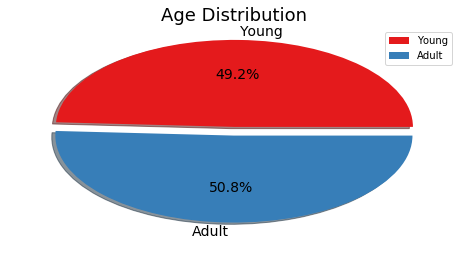

In [34]:
# visualization of young and adult poulation
age = [younger, adult]
plt.figure(figsize=(8,4))
label = ['Young', 'Adult']
plt.title('Age Distribution', size =18)
color = sns.color_palette('Set1')
explode = [0.1, 0]
plt.pie(age, labels = label, explode=explode,
        colors = color, autopct='%.1f%%', shadow = True,  textprops={'fontsize': 14, 'color':'black'})
plt.legend()
plt.show()

Adult population is slightly higher than young population. This implies that there will be more adults on scheduled day than younger people.

### Research Question 3  

>#### Which of the weekdays are patients most likely to be present?

##### Presence of Genders in Weekdays

In [35]:
# Number of male patients that are present on appointment day
male_present = med_df[(med_df.gender == 'M') & (med_df.no_show == 'No')].days_name

# counting and sorting of male patients and days they were present
male_day = male_present.value_counts().sort_values(ascending = False).to_frame()

# renaming days_name column to male_number
male_day.rename(columns={'days_name':'male_number'}, inplace=True)
male_day

,male_number
Tuesday,7192
Wednesday,6696
Monday,6656
Friday,5377
Thursday,5035
Saturday,6


In [36]:
# Number of male patients that are present on appointment day
female_present = med_df[(med_df.gender == 'F') & (med_df.no_show == 'No')].days_name

# counting and sorting female numbers on weekdays
female_day = female_present.value_counts().sort_values(ascending = False).to_frame()

# changing column's name
female_day.rename(columns={'days_name':'female_number'}, inplace=True) 
female_day

,female_number
Tuesday,13685
Wednesday,12687
Monday,11868
Friday,9651
Thursday,9338
Saturday,17


In [37]:
# combining male_df and female_df dataframes
male_female_df = pd.concat([male_day,female_day], axis=1)  
male_female

,male,female,area
JARDIM CAMBURI,2105.0,4147.0,JARDIM CAMBURI
MARIA ORTIZ,1645.0,2941.0,MARIA ORTIZ
RESISTÊNCIA,1182.0,2343.0,RESISTÊNCIA
CENTRO,1059.0,1572.0,CENTRO
JARDIM DA PENHA,995.0,2251.0,JARDIM DA PENHA
SANTA MARTHA,954.0,1681.0,SANTA MARTHA
ITARARÉ,929.0,1662.0,ITARARÉ
TABUAZEIRO,908.0,1651.0,TABUAZEIRO
JESUS DE NAZARETH,788.0,1369.0,JESUS DE NAZARETH


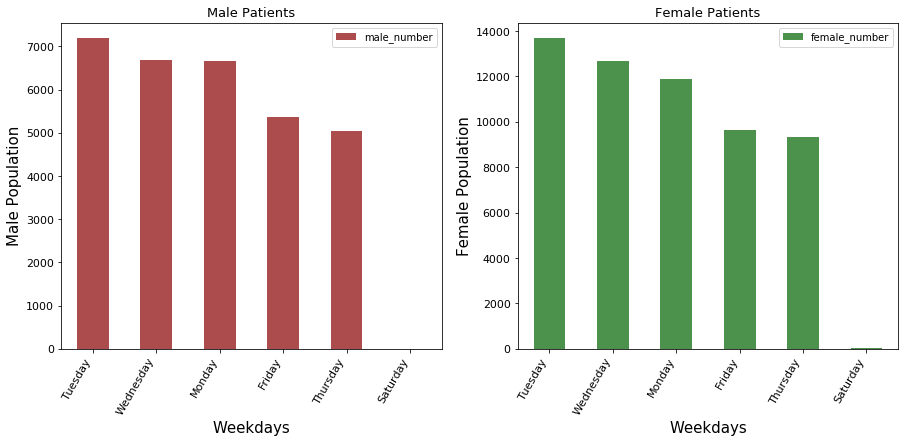

In [38]:
# Visual analyses of male  and female population on weekdays
subplots_bar(male_female_df.male_number, 'Male Patients', 'Weekdays', 'Male Population',
            male_female_df.index, 'darkred', male_female_df.female_number, 'Female Patients',
            'Weekdays', 'Female Population', male_female_df.index, 'darkgreen')

>Tuesdays are the days most likely to have highest number of patients in the week. The number would likely drop on Wednesdays, Mondays, and maintain the downward trend on Fridays, Thursdays, and expect a very low number of patients on Saturdays. Sundays are not captured in the dataset or scheduled day is not fixed on that day.

### Research Question 4  
>#### Are patients captured in welfare program (scholarship) more than those not captured and are patients that received sms-message be more than those that did not on scheduled day?

##### Patients classification in Relation to welfare program

In [39]:
# patients not captured in welfare program (scholarship)
not_scholar = med_df[(med_df.scholarship == 0) & (med_df.no_show == 'No')].scheduled_date

# to count their numbers
not_scholar= not_scholar.value_counts()
not_scholar.count()

76218

In [40]:
# patients captured in the welfare program (scholarship)
scholar_yes = med_df[(med_df.scholarship == 1) & (med_df.no_show == 'No')].scheduled_date

# to count their numbers
scholar_yes = scholar_yes.value_counts()

scholar_yes.count()

8144

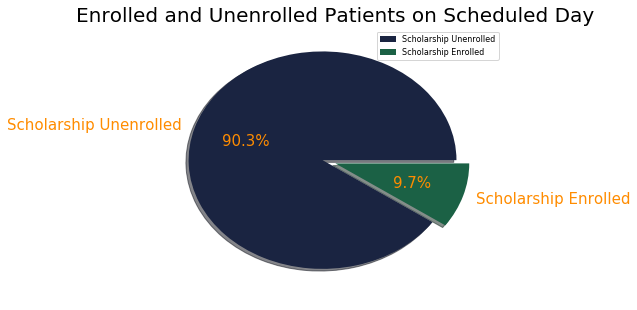

In [51]:
scholar = [not_scholar.count(), scholar_yes.count()]
plt.figure(figsize=(6,5))
label = ['Scholarship Unenrolled','Scholarship Enrolled']
plt.title('Enrolled and Unenrolled Patients on Scheduled Day', size =20)
color = sns.color_palette('cubehelix')
explode = [0.1, 0]
plt.pie(scholar, labels = label, explode=explode,colors = color, 
        autopct='%.1f%%', shadow = True, textprops={'fontsize': 15, 'color':'darkorange'})
plt.legend(fontsize=8)
plt.show()

 >Over 90% of patients on scheduled day are not enrolled in the scholarship program. Compared to those enrolled that are less than 10%. For this reason, patients that are not enrolled are expected to more on scheduled day.

##### Distribution of SMS message to Patients

In [42]:
# to know patients that received sms message and were also present on scheduled day
sms_yes = med_df[(med_df.sms_received == 1) & (med_df.no_show == 'No')].neighbourhood

# counting and sorting of patients that received sms message
sms_yes_hood = sms_yes.value_counts().sort_values(ascending = False).head(20).to_frame()

# renaming of column label neighbourhood to SMS_YES(the label is capitalized for redability on visual legend)
sms_yes_hood.rename(columns={'neighbourhood':'SMS_YES'}, inplace=True) 
sms_yes_hood.head()

,SMS_YES
JARDIM CAMBURI,1939
MARIA ORTIZ,1460
JARDIM DA PENHA,1130
RESISTÊNCIA,1054
CENTRO,784


In [43]:
# to know patients that did not receive sms message but were present on scheduled day
sms_no = med_df[(med_df.sms_received == 0) & (med_df.no_show == 'No')].neighbourhood

# counting and sorting of patients that received sms message
sms_no_hood = sms_no.value_counts().sort_values(ascending = False).head(20).to_frame()

# renaming of column label neighbourhood to NO_SMS(the label is capitalized for redability on visual legend)
sms_no_hood.rename(columns={'neighbourhood':'NO_SMS'}, inplace=True)
sms_no_hood.head()

,NO_SMS
JARDIM CAMBURI,4313
MARIA ORTIZ,3126
RESISTÊNCIA,2471
JARDIM DA PENHA,2116
SANTA MARTHA,2070


In [44]:
# combining sms_no_hood and sms_yes_hood dataframes
sms_yes_no = pd.concat([sms_no_hood, sms_yes_hood], axis=1, sort=False)

# removing rows with null values
sms_yes_no.dropna(inplace=True)
sms_yes_no.head()

,NO_SMS,SMS_YES
JARDIM CAMBURI,4313.0,1939.0
MARIA ORTIZ,3126.0,1460.0
RESISTÊNCIA,2471.0,1054.0
JARDIM DA PENHA,2116.0,1130.0
SANTA MARTHA,2070.0,565.0


In [45]:
# adding area column
sms_yes_no['area'] = sms_yes_no.index
sms_yes_no.head()

,NO_SMS,SMS_YES,area
JARDIM CAMBURI,4313.0,1939.0,JARDIM CAMBURI
MARIA ORTIZ,3126.0,1460.0,MARIA ORTIZ
RESISTÊNCIA,2471.0,1054.0,RESISTÊNCIA
JARDIM DA PENHA,2116.0,1130.0,JARDIM DA PENHA
SANTA MARTHA,2070.0,565.0,SANTA MARTHA


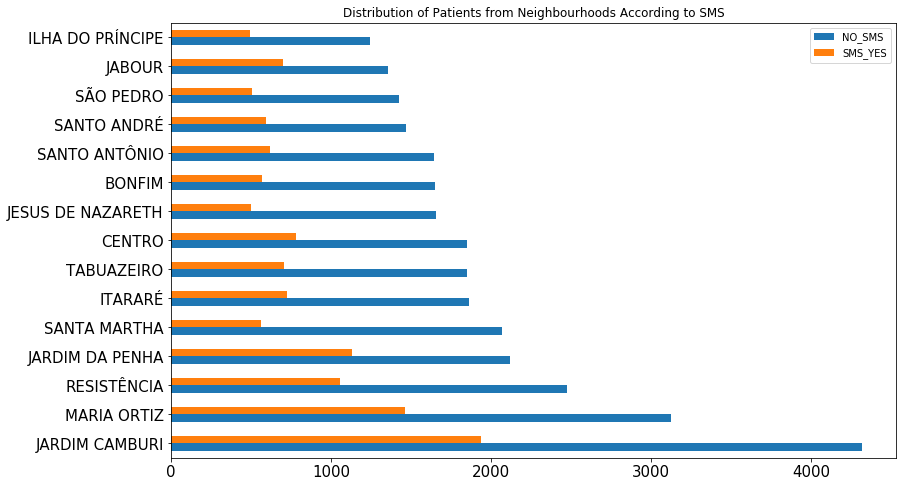

In [46]:
# bar chart for patients that received SMS and patients that did not receive
sms_yes_no.plot(kind='barh', 
                figsize =(13,8), fontsize=15, 
                title=('Distribution of Patients from Neighbourhoods According to SMS'));

>Patients that received SMS are twice lower than patients that did not received SMS on scheduled day. It can be assumed that sending SMS to patients is less important. 

<a id='conclusions'></a>
## Conclusions

>The investigative analysis of this project started looking at distribution of patients across neighbourhoods. The most populated neighbourhood; Jardim Camburi with 7717 patients, will possibly have more number of patients present on scheduled day. Unlike Parque Industrial that has 1 patient.

>In terms of gender, female patients are likely to be available on scheduled day having 65% of the population compared to male patients with 35% population. Additionally, patients that are young and those that are old are almost equal. This means that it will be difficult to suggest age group of people that will be available on scheduled day.

>This project also revealed the days of the week that patients will likely be present at medical facilities. Patients are more likely to be present on Tuesdays, Wednesdays, Mondays, Fridays, and Thursdays respectively. Saturdays and Sundays are days that patients might not go for medical appointment.

>Pertaining to schorlaship (welfare program), patients that are not beneficiaries are more than 90% while, those enrolled are less than 10%. Likewisely, patients that received sms message are twice lower than patients that did not receive sms message but present on scheduled day. It is easier to suggest that patients that are not on scholarship and not receiving sms message will most likely be present on scheduled day.

**Limitations**
>1. The dataset covered only 3 months (April - June, 2016) timeline. This timeline is too short to come up with reliable prediction.

>2. Neighbourhoods with highest number of population present might have some unknown factors responsible for this. Possibly availability of modern equipments or highly skilled health workers in medical facilities of some neighbourhoods.

>3. Most of the variables contain label data that limit the level of statistical analysis that could be performed.

>4. Further information or study is needed to ascertain reasons patients receiving sms message are distantly lower than patients not receiving sms message.

#### References:
https://matplotlib.org/stable/gallery/color/named_colors.html

https://matplotlib.org/stable/tutorials/intermediate/arranging_axes.html#sphx-glr-tutorials-intermediate-arranging-axes-py

https://stackoverflow.com/questions/59056087/typeerror-to-frame-got-an-unexpected-keyword-argument-index

https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.html

https://seaborn.pydata.org/tutorial/color_palettes.html
